In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [23]:
from NEAT.genome import Genome
l: list[Genome] = []
g = Genome(2, 3)
for i in range(5):
    l.append(g)

In [24]:
for i in range(len(l)):
    l[i].mutate()

In [25]:
for i in range(len(l)):
    for nodes, conn in l[i].connections.genes.items():
        print(nodes, conn.Weight, conn.Enabled, conn.Innovation)

(1, 3) -0.8448000000000002 True 1
(1, 4) 0.126 True 2
(1, 5) 0.018240000000000003 False 3
(2, 3) 0.03360000000000001 True 4
(2, 4) -0.0102 True 5
(2, 5) 0.004 False 6
(1, 3) -0.8448000000000002 True 1
(1, 4) 0.126 True 2
(1, 5) 0.018240000000000003 False 3
(2, 3) 0.03360000000000001 True 4
(2, 4) -0.0102 True 5
(2, 5) 0.004 False 6
(1, 3) -0.8448000000000002 True 1
(1, 4) 0.126 True 2
(1, 5) 0.018240000000000003 False 3
(2, 3) 0.03360000000000001 True 4
(2, 4) -0.0102 True 5
(2, 5) 0.004 False 6
(1, 3) -0.8448000000000002 True 1
(1, 4) 0.126 True 2
(1, 5) 0.018240000000000003 False 3
(2, 3) 0.03360000000000001 True 4
(2, 4) -0.0102 True 5
(2, 5) 0.004 False 6
(1, 3) -0.8448000000000002 True 1
(1, 4) 0.126 True 2
(1, 5) 0.018240000000000003 False 3
(2, 3) 0.03360000000000001 True 4
(2, 4) -0.0102 True 5
(2, 5) 0.004 False 6


In [26]:
from NEAT.genome import Genome

g1 = Genome(2, 3)

In [27]:
for i in range(20):
    g1.mutate()

In [28]:
for i in g1.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN


In [29]:
list_edges = []
for nodes, conn in g1.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    if conn.Enabled:
        list_edges.append(nodes)

(1, 3) 8.107390874419207e-05 True 1
(1, 4) 0.016573627732147225 True 2
(1, 5) 0.018129650933721625 True 3
(2, 3) -0.34 True 4
(2, 4) 21.427944496358414 True 5
(2, 5) 0.010105366118400004 False 6
(2, 6) -0.15692023620000012 True 7
(6, 5) 0.03355147173888004 True 10
(2, 7) 0.0042768000000000025 True 13
(7, 5) 0.21847644000000008 True 14


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN


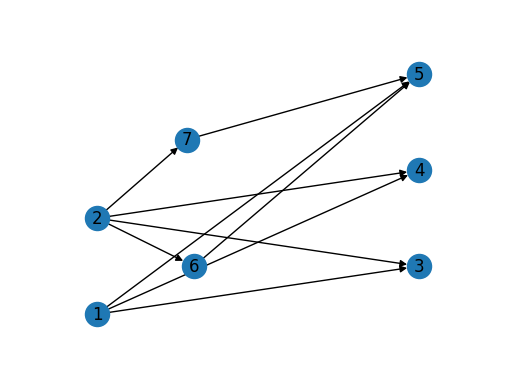

In [30]:
left_nodes = []
middle_nodes = []
right_nodes = []

for i in g1.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes.append(i.id)
    else:   # OUTPUT
        right_nodes.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

G = nx.DiGraph()
G.add_edges_from(list_edges)
nx.draw_networkx(G, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [31]:
from NEAT.neural_network import NeuralNetwork

nn1 = NeuralNetwork(g1)
nn2 = NeuralNetwork(g1)

print(nn1.forward({1: 0.5, 2: 1.2}))
print(nn2.forward({1: 0.5, 2: 1.2}))


[0.3994015044113617, 0.9999999999932523, 0.5356516701912832]
[0.3994015044113617, 0.9999999999932523, 0.5356516701912832]


In [32]:
g2 = Genome(2, 3)
for i in range(20):
    g2.mutate()

In [33]:
for i in g2.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT


In [34]:
list_edges2 = []
list_conn2 = []
for nodes, conn in g2.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    list_conn2.append(conn)
    if conn.Enabled:
        list_edges2.append(nodes)

(1, 3) 0.002519112960000002 True 1
(1, 4) -1.3471920000000006 True 2
(1, 5) -0.99 True 3
(2, 3) 0.0002331386366400002 False 4
(2, 4) 0.000932834539929601 True 5
(2, 5) -0.24300000000000005 True 6


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT


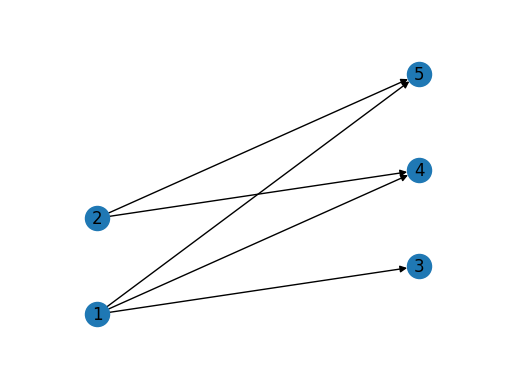

In [35]:
left_nodes2 = []
middle_nodes2 = []
right_nodes2 = []

for i in g2.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes2.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes2.append(i.id)
    else:   # OUTPUT
        right_nodes2.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes2)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes2)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes2)})

G2 = nx.DiGraph()
G2.add_edges_from(list_edges2)
nx.draw_networkx(G2, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [36]:
nn = NeuralNetwork(g2)

print(nn.forward({1: 0.5, 2: 1.2}))

[0.5003148890783695, 0.3379425109521614, 0.3128991811678686]


In [37]:
from NEAT.species import Species

g1.fitness = 1
g2.fitness = 0.5

gens = [g1, g2]

In [38]:
s = Species(.5, gens, 1, 1, 1)
offspring: Genome = s.cross_over(g1, g2)

In [39]:
for i in offspring.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN


In [40]:
list_edges3 = []
for nodes, conn in offspring.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    if conn.Enabled:
        list_edges3.append(nodes)

(7, 5) 0.21847644000000008 True 14
(2, 7) 0.0042768000000000025 True 13
(6, 5) 0.03355147173888004 True 10
(2, 6) -0.15692023620000012 True 7
(2, 5) -0.11644731694080002 False 6
(2, 4) 10.714438665449173 True 5
(2, 3) -0.16988343068168002 True 4
(1, 5) -0.48593517453313917 True 3
(1, 4) -0.6653091861339266 True 2
(1, 3) 0.0013000934343720969 True 1


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN


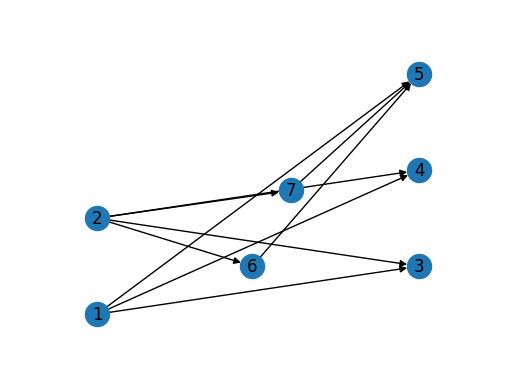

In [41]:
left_nodes3 = []
middle_nodes3 = []
right_nodes3 = []

for i in offspring.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes3.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes3.append(i.id)
    else:   # OUTPUT
        right_nodes3.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes3)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes3)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes3)})

G3 = nx.DiGraph()
G3.add_edges_from(list_edges3)
nx.draw_networkx(G3, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [42]:
nn = NeuralNetwork(offspring)

print(nn.forward({1: 0.5, 2: 1.2}))

[0.4493715849036855, 0.9999963641783765, 0.41066530482985425]
